In [217]:
# According to World Happiness Report in 2021, Korea shows low ladder score of happiness compare to other country with high GDP rank.
# We wondered why Korea is not so happy according to the report. And we want to know if we can be more happier.
# So we decided to analyze how and what variables are being used to calculate our happiness.

In [218]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, minmax_scale
from sklearn .cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from plotly.offline import iplot
import plotly.graph_objs as go
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [219]:
# firstly, we need to analyze our dataset.
# we will print overall dataset, shape, index, and columns

report=pd.read_csv('world-happiness-report-2021.csv')
report

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [220]:
report.shape #show shape of the array

(149, 20)

In [221]:
report.index #show index

RangeIndex(start=0, stop=149, step=1)

In [222]:
report.columns #show all column

# knowing each columns' meaning is important. followings are the result of our analyzation of each key features
# Ladder score is a same as happiness score
# upperwhisker,lowerwhisker is happiness score's whisker
# Logged GDP per capita means individual GDP level
# Social Support means whether there is anyone who can help in times of difficulty
# Healthy life expectancy means a healthy life period from birth
# Freedom to make life choices means whether satisfy or not to freedom to choice
# Generosity means whether donations were made last month.
# Perceptions of corruption means whether businesses or governments are corrupted as a whole.
# Dystopia+residual is how people feel bad about their future

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [223]:
# check missing values
report.isna().sum()

# it seems there's no any missing value in our dataset. so we don't have to deal with it.

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [224]:
# amount of contries
# there's 149 countries in our dataset
report['Country name'].size

149


KeyboardInterrupt



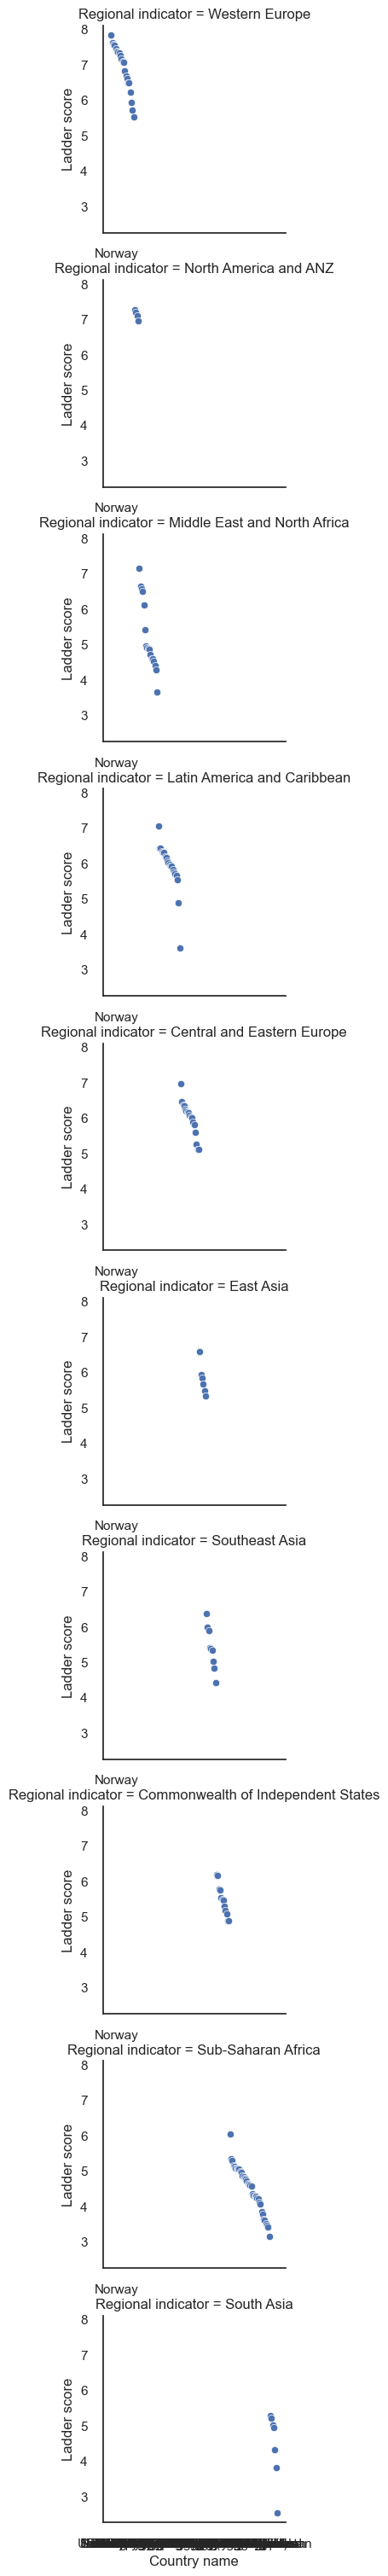

In [225]:
# these are the Graphs between country of each region and ladder score
# we can infer the correlation between region and ladder score
g=sns.FacetGrid(report,col='Regional indicator',col_wrap=1)
g.map(sns.scatterplot,'Country name','Ladder score')
g.set(xticklabels=[])

In [ ]:
# The correlation between ladder score and Logged GDP per capita
x=report.loc[:,'Ladder score']
y=report.loc[:,'Logged GDP per capita']
plt.scatter(x,y)
plt.xlabel('Ladder score')
plt.ylabel('Logged GDP per capita')
plt.show()

In [ ]:
# The correlation between ladder score and Sccial support
x=report.loc[:,'Ladder score']
y=report.loc[:,'Social support']
plt.scatter(x,y)
plt.xlabel('Ladder score')
plt.ylabel('Social support')
plt.show()

In [ ]:
# The correlation between ladder score and Healthy life expectancy
x=report.loc[:,'Ladder score']
y=report.loc[:,'Healthy life expectancy']
plt.scatter(x,y)
plt.xlabel('Ladder score')
plt.ylabel('Healthy life expectancy')
plt.show()

In [ ]:
# The correlation between ladder score and Freedom to make life choices
x=report.loc[:,'Ladder score']
y=report.loc[:,'Freedom to make life choices']
plt.scatter(x,y)
plt.xlabel('Ladder score')
plt.ylabel('Freedom to make life choices')
plt.show()

In [ ]:
# The correlation between ladder score and Generosity
x=report.loc[:,'Ladder score']
y=report.loc[:,'Generosity']
plt.scatter(x,y)
plt.xlabel('Ladder score')
plt.ylabel('Generosity')
plt.show()

In [ ]:
# The correlation between ladder score and Perception of corruption
x=report.loc[:,'Ladder score']
y=report.loc[:,'Perceptions of corruption']
plt.scatter(x,y)
plt.xlabel('Ladder score')
plt.ylabel('Perceptions of corruption')
plt.show()

In [ ]:
# The correlation between ladder score and Dystopia+residual
x=report.loc[:,'Ladder score']
y=report.loc[:,'Dystopia + residual']
plt.scatter(x,y)
plt.xlabel('Ladder score')
plt.ylabel('Dystopia + residual')
plt.show()

In [ ]:
temp_report = report.drop(report.columns[3:6],axis='columns')

In [ ]:
# in sum, the correlation is represented by this heatmap matrix
dataset_x = report.iloc[:, 6:12]
dataset_y = report.iloc[:, 2]


corr_report = pd.concat([dataset_x, dataset_y], axis=1)
corrmat = corr_report.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

graph = sns.heatmap(corr_report[top_corr_features].corr(), annot=True,cmap="RdYlGn")

In [ ]:
# and this is correlation values derived by SeleckKBest.
# there are redundant values named Explained. so we will drop this values later.

X=temp_report.iloc[:,3:]
y=temp_report.iloc[:,2]
bestfeatures=SelectKBest(score_func=f_regression,k=14)
fit=bestfeatures.fit(X,y)
dfcolumns=pd.DataFrame(X.columns)
dfscores=pd.DataFrame(fit.scores_)

featureScores=pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns =['Specs','Score']
print(featureScores.nlargest(14,'Score'))

In [ ]:
# by the above correlation heatmap matrix and SeleckKBest result,
# we know that Logged GDP per capita, Social support, and Healthy life expectancy is highly related feature with the ladder score.
# so, our decision is, select X value as the average value of three features is the best choice
# and we must avoid including Generosity and Perceptions of corruption as they have negative value.

mean = pd.DataFrame(data = report.iloc[:, 6:9].mean(axis='columns'), columns=['mean'])
cluster_dataset = pd.concat([dataset_y,mean], axis=1)

# case : cluster's number is 2.
# this means the countries in the whole dataset will be distinguished with 2 groups : happy and unhappy
KM = KMeans(n_clusters=2).fit(cluster_dataset)

colors = []
for i in KM.labels_:
  if i == 0:
    colors.append('skyblue')
  elif i == 1:
    colors.append('orange')

plt.scatter(cluster_dataset['mean'], cluster_dataset['Ladder score'], c=colors)

In [ ]:
# Clustering Evaluation with Scikitlearn's Silhouette
# The silhouette sample calculates and returns the silhouette coefficient for the corresponding data set when the parameter is passed as above.
# Metric receives parameters to measure the distance between elements. The default is Euclidean
# Sample_size is entered if sampling is applied in the score calculation, and set to None if sampling is not used. The default is None.
# **kwds is a parameter used to pass the parameters required by some distance functions.

silhouette_dataset = pd.DataFrame(data=report, columns=['Logged GDP per capita', 'Social support', 'Healthy life expectancy'
                                                        , 'Freedom to make life choices'])

silhouette_dataset['cluster'] = KM.labels_

score_samples = silhouette_samples(silhouette_dataset, silhouette_dataset['cluster'])
silhouette_dataset['silhoutte_coeff'] = score_samples

average_score = silhouette_score(silhouette_dataset, silhouette_dataset['cluster'])

# silhouette_score value will between the 0 and 1. and if score getting bigger, the better result comes up.
# but the stability of each cluster's score is also important.
# that is, if the variance of each cluster's score getting bigger, the result will be getting worse.

print("average score")
print(average_score)
print(silhouette_dataset.groupby('cluster')['silhoutte_coeff'].mean())

In [ ]:
# case :  cluster's number is 4.
# this means the countries in the whole dataset will be distinguished with 4 groups : happy, not bad, not good, unhappy

KM = KMeans(n_clusters=4).fit(cluster_dataset)

colors = []
for i in KM.labels_:
  if i == 0:
    colors.append('skyblue')
  elif i == 1:
    colors.append('orange')
  elif i == 2:
      colors.append('green')
  elif i == 3:
      colors.append('red')

plt.scatter(cluster_dataset['mean'], cluster_dataset['Ladder score'], c=colors)
plt.show()

In [ ]:
silhouette_dataset4 = pd.DataFrame(data=report, columns=['Logged GDP per capita', 'Social support', 'Healthy life expectancy'
                                                        , 'Freedom to make life choices'])

silhouette_dataset4['cluster'] = KM.labels_

score_samples = silhouette_samples(silhouette_dataset4, silhouette_dataset4['cluster'])
silhouette_dataset4['silhoutte_coeff'] = score_samples

average_score = silhouette_score(silhouette_dataset4, silhouette_dataset4['cluster'])
print("average score")
print(average_score)
print(silhouette_dataset4.groupby('cluster')['silhoutte_coeff'].mean())

In [ ]:
# case : cluster's number is 3
# this means the countries in the whole dataset will be distinguished with 3 groups : happy, normal, unhappy

mean = pd.DataFrame(data = report.iloc[:, 6:9].mean(axis='columns'), columns=['mean'])
cluster_dataset = pd.concat([dataset_y,mean], axis=1)

KM = KMeans(n_clusters=3).fit(cluster_dataset)

colors = []
for i in KM.labels_:
  if i == 0:
    colors.append('skyblue')
  elif i == 1:
    colors.append('orange')
  elif i == 2:
    colors.append('green')

plt.scatter(cluster_dataset['mean'], cluster_dataset['Ladder score'], c=colors)
plt.show()

In [ ]:
silhouette_dataset3 = pd.DataFrame(data=report, columns=['Logged GDP per capita', 'Social support', 'Healthy life expectancy'
                                                        , 'Freedom to make life choices'])

silhouette_dataset3['cluster'] = KM.labels_

score_samples = silhouette_samples(silhouette_dataset3, silhouette_dataset3['cluster'])
silhouette_dataset3['silhoutte_coeff'] = score_samples

average_score = silhouette_score(silhouette_dataset3, silhouette_dataset3['cluster'])
print("average score")
print(average_score)
print(silhouette_dataset3.groupby('cluster')['silhoutte_coeff'].mean())

In [ ]:
# now we have the result of cluster score in each case of k = 2, 3, 4.
# and with that result, the best k value is 2, because it has the highest score.
# But if k becomes 2, the world is extremely divided into happy and unhappy groups.
# this is not desirable situation. so we will additionally check elbow to decide proper k value.

# Yellowbrick extends the Scikit-Learn API to make model selection and hyperparameter tuning easier. it’s using Matplotlib.
from yellowbrick.cluster import KElbowVisualizer
from sklearn .cluster import KMeans

model = KMeans()
# Visualizers are the core objects in Yellowbrick.
# Visualizers can wrap a model estimator
# https://www.scikit-yb.org/en/latest/

df_GL = temp_report.iloc[:, 3:9]
df_GL_mean = pd.DataFrame(data = df_GL.mean(axis='columns'), columns=['mean'])
df_ladder_score = temp_report.loc[:, 'Ladder score']
df = pd.concat([df_GL_mean, df_ladder_score], axis=1)

#K-Elbow Plot : select k using the elbow method and various metrics
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(df)

In [ ]:
# it seems that cluster's number is proper when 3.
# and with result of silhouette, when k=3, the deviations of each clusters is stable. (small)
# so we decide to choose 3 as cluster's number

# now we gonna save this clustered result to new data frame : clustered_report.
df_cluster = pd.DataFrame(data = KM.labels_, columns=['cluster'])
clustered_report = pd.DataFrame(data=report)
clustered_report = pd.concat([clustered_report, df_cluster], axis=1)
# dataset that includes cluster information
clustered_report

In [ ]:
korea_cluster = clustered_report.loc[61]
korea_cluster = korea_cluster.drop(['Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Logged GDP per capita',
                                    'Social support', 'Healthy life expectancy', 'Freedom to make life choices',
                                    'Generosity', 'Perceptions of corruption', 'Ladder score in Dystopia',
                                    'Explained by: Log GDP per capita', 'Explained by: Social support',
                                    'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices',
                                    'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual'])
korea_cluster

In [ ]:

data = dict(type = 'choropleth',
           locations = clustered_report['Country name'],
           locationmode = 'country names',
           z = clustered_report['cluster'],
           text = clustered_report['Country name'],
           colorbar = {'title':'cluster'})
layout = dict(title = 'Happiness Index 2021',
             geo = dict(showframe = False,
                       projection = {'type': 'Mercator'}))
choromap3 = go.Figure(data = [data])
iplot(choromap3)


In [ ]:
# Showes that 17 countries in western Europe are in the top 30 happiest countries
top30= report[:30]
print(top30['Regional indicator'].value_counts())

In [ ]:
# now we are going to drop "Explained" values
new_report=report.drop(report.columns[3:6],axis='columns')
new_report=new_report.drop(new_report.columns[9:16],axis='columns')
new_report

In [ ]:
# and with the dataset without Explained data, we will check feature importances again by SelectKBest

X=new_report.iloc[:,3:]
y=new_report.iloc[:,2]
bestfeatures=SelectKBest(score_func=f_regression,k=7)
fit=bestfeatures.fit(X,y)
dfcolumns=pd.DataFrame(X.columns)
dfscores=pd.DataFrame(fit.scores_)

featureScores=pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns =['Specs','Score']
print(featureScores.nlargest(7,'Score'))

In [ ]:
# again, plot correlation with the heatmap matrix
sns.set_theme(style="white")
ax = sns.heatmap(new_report[new_report.columns[3:-1]].corr()).set_title("All Countries")


In [ ]:
# update dataset by dropping Dystopia + residual column
# Dystopia is an imaginary country that has the world's least-happy people.
# The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared
# The residuals, or unexplained components, differ for each country,
# reflecting the extent to which the six variables either over- or under-explain average 2019-2021 life evaluations.
new_report=new_report.drop(new_report.columns[9],axis='columns')
new_report

In [ ]:
# 한국 비교 보여줄 plot 여기서 그려주기
# mean = pd.DataFrame(data = report.iloc[:, 6:9].mean(axis='columns'), columns=['mean'])
# cluster_dataset = pd.concat([dataset_y,mean], axis=1)

world_mean = report.mean()
korea = report.loc[61]

compare_dataset = pd.concat([world_mean, korea], axis=1)
cd1 = compare_dataset.iloc[4:10]
cd1.columns = ['worldwide', 'korea']

cd1 = cd1.drop(['Logged GDP per capita', 'Healthy life expectancy'])
cd1.plot.bar()


In [ ]:
# now we have to prepare dataset for the linear regression.
# first, we will apply get_dummies so that we prevent the unpredicted and unwanted co-relation between features
df=pd.get_dummies(data=new_report, columns=['Regional indicator'])
df

In [ ]:
# and then define X and y, which will be used in linear regression
X=df.iloc[:,2:8]
y=df.iloc[:,1]
X=pd.DataFrame(X, columns = ['Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption'])
y=pd.DataFrame(y, columns=['Ladder score'])
X

In [ ]:
# scaling the dataset before model fitting
# we used StandardScaler

scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
scaler.fit(y)
y=scaler.transform(y)
X=pd.DataFrame(X, columns = ['Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption'])
y=pd.DataFrame(y, columns=['Ladder score'])
print(X)
print(y)

In [ ]:
# and we used sklearn's train test split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=23)

In [ ]:
# defining linear regression model function
# we have 1 parameter : test size so that we can easily test various test size with the same condition
# firstly, we used all of the top 3 best scored in select K best.
def multi_linRegression(testSize):

    a=X.iloc[:,0:3]
    b=report['Ladder score']
    train_a,test_a,train_b,test_b=train_test_split(a,b,test_size=testSize,random_state=24)
    #Multiple Linear Regression Model Using Top 3 features
    lin = LinearRegression()
    lin.fit(train_X, train_y) 
    predict = lin.predict(test_X)

    #Evaluate the model
    print('score: ', lin.score(test_X, test_y))
    print('MSE: ',mean_squared_error(predict, test_y))
    print('RMSE: ',mean_squared_error(predict, test_y)**1/2)
        
    #Cross Validation
    from sklearn.model_selection import cross_val_score
    k = 5
    cv = cross_val_score(lin , train_a, train_b, cv = k)
    print('Cross Validation Scores: ' , cv)
    print('Cross Validation Average: ', np.mean(cv))

In [ ]:
# secondly, we used each of the three best scored in select K best.
# 1. GDP only

def GDP_linRegression(testSize):
    a=X['Logged GDP per capita']
    b=y['Ladder score']
    from sklearn.model_selection import train_test_split
    train_a,test_a,train_b,test_b=train_test_split(a,b,test_size=testSize,random_state=24)

    plt.plot(train_a,train_b,'o')
    plt.show()

    line_fitter = LinearRegression()
    line_fitter.fit(train_a.values.reshape(-1,1), train_b)
    predict = line_fitter.predict(test_a.values.reshape(-1,1))

    plt.plot(test_a, test_b, 'o')
    plt.plot(test_a,line_fitter.predict(test_a.values.reshape(-1,1)))
    plt.show()
    #Evaluate the model
    print('score: ', line_fitter.score(test_a.values.reshape(-1,1), test_b.values.reshape(-1,1)))
    print('MSE: ',mean_squared_error(predict, test_b.values.reshape(-1,1)))
    print('RMSE: ',mean_squared_error(predict, test_b.values.reshape(-1,1))**1/2)
    
      #Cross Validation
    from sklearn.model_selection import cross_val_score
    k = 5
    cv = cross_val_score(line_fitter , train_a.values.reshape(-1,1), train_b, cv = k)
    print('Cross Validation Scores: ' , cv)
    print('Cross Validation Average: ', np.mean(cv))

In [ ]:
# 2. Healthyness only
def Healthy_linRegression(testSize) :
    a=X['Healthy life expectancy']
    b=y['Ladder score']
    train_a,test_a,train_b,test_b=train_test_split(a,b,test_size=testSize,random_state=24)

    plt.plot(train_a,train_b,'o')
    plt.show()

    line_fitter = LinearRegression()
    line_fitter.fit(train_a.values.reshape(-1,1), train_b)
    predict = line_fitter.predict(test_a.values.reshape(-1,1))

    plt.plot(test_a, test_b, 'o')
    plt.plot(test_a,line_fitter.predict(test_a.values.reshape(-1,1)))
    plt.show()
    #Evaluate the model
    print('score: ', line_fitter.score(test_a.values.reshape(-1,1), test_b.values.reshape(-1,1)))
    print('MSE: ',mean_squared_error(predict, test_b.values.reshape(-1,1)))
    print('RMSE: ',mean_squared_error(predict, test_b.values.reshape(-1,1))**1/2)
    
    #Cross Validation
    from sklearn.model_selection import cross_val_score
    k = 5
    cv = cross_val_score(line_fitter , train_a.values.reshape(-1,1), train_b, cv = k)
    print('Cross Validation Scores: ' , cv)
    print('Cross Validation Average: ', np.mean(cv))

In [ ]:
# 3. Social support only

def Social_linRegression(testSize) :
    a=X['Social support']
    b=report['Ladder score']
    train_a,test_a,train_b,test_b=train_test_split(a,b,test_size=testSize,random_state=22)

    plt.plot(train_a,train_b,'o')
    plt.show()

    line_fitter = LinearRegression()
    line_fitter.fit(train_a.values.reshape(-1,1), train_b)
    predict = line_fitter.predict(test_a.values.reshape(-1,1))

    plt.plot(test_a, test_b, 'o')
    plt.plot(test_a,line_fitter.predict(test_a.values.reshape(-1,1)))
    plt.show()
    #Evaluate the model
    print('score: ', line_fitter.score(test_a.values.reshape(-1,1), test_b.values.reshape(-1,1)))
    print('MSE: ',mean_squared_error(predict, test_b.values.reshape(-1,1)))
    print('RMSE: ',mean_squared_error(predict, test_b.values.reshape(-1,1))**1/2)
    
      #Cross Validation
    from sklearn.model_selection import cross_val_score
    k = 5
    cv = cross_val_score(line_fitter , train_a.values.reshape(-1,1), train_b, cv = k)
    print('Cross Validation Scores: ' , cv)
    print('Cross Validation Average: ', np.mean(cv))

In [ ]:
# now we will check the score of cases : test size 0.2, 0.3, 0.4

print("test size 0.2")
print(multi_linRegression(0.2))
print("test size 0.3")
print(multi_linRegression(0.3))
print("test size 0.4")
print(multi_linRegression(0.4))

In [ ]:
# GDP only with the test size 0.2
GDP_linRegression(0.2)

In [ ]:
# GDP only with the test size 0.3
GDP_linRegression(0.3)

In [ ]:
# GDP only with the test size 0.4
GDP_linRegression(0.4)

In [ ]:
# Healthy life expectancy only with the test size 0.2
Healthy_linRegression(0.2)

In [ ]:
# Healthy life expectancy only with the test size 0.3
Healthy_linRegression(0.3)

In [ ]:
# Healthy life expectancy only with the test size 0.4
Healthy_linRegression(0.4)

In [ ]:
# Social support only with the test size 0.2
Social_linRegression(0.2)

In [ ]:
# Social support only with the test size 0.3
Social_linRegression(0.3)

In [ ]:
# Social support only with the test size 0.4
Social_linRegression(0.4)

In [ ]:
# next, we will additionally apply decision tree and KNN algorithm for comparing and deciding best combination
# Decision Tree : Using all atributes to get the target feature(Ladder Score)
x_data=new_report.iloc[:,3:9]
y_data=new_report.iloc[:,2]

#normalization
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values
y = (y_data - np.min(y_data))/(np.max(y_data) - np.min(y_data))

#split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1)

#Decision Tree Regression
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

In [ ]:
#Plot Decision Tree

fn=['Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=fn,fontsize=7,  
                   filled=True)

In [ ]:
# printing accuracy of the above Decision Tree algorithm
print("print accuracy of Decision Tree algorithm:",dt.score(x_test,y_test))

In [ ]:
# Using GridSearchCV for finding hyperparameter and get the best score

grid = {'min_samples_leaf': np.arange(1,25),"criterion":["squared_error","friedman_mse","absolute_error"]}
det = DecisionTreeRegressor()
det_cv = GridSearchCV(det, grid, cv=3)
det_cv.fit(x_train,y_train)

# Print hyperparameter and best score
print("Tuned hyperparameter k: ", det_cv.best_params_) 
print("Best score: ", det_cv.best_score_)

In [ ]:
# and then we applied KNN algorithm.
# we also used GridSearchCV for finding hyperparameter and best score

#K nearest neighbors

x_data=new_report.iloc[:,3:9]
y_data=new_report.iloc[:,2]

#normalization (min, max)
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values
y = (y_data - np.min(y_data))/(np.max(y_data) - np.min(y_data))

#split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=3)



#gridsearchCV for KNN model
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsRegressor()
knn_cv = GridSearchCV(knn, grid, cv=5) # GridSearchCV
knn_cv.fit(x_train,y_train)# Fit

# Print hyperparameter
print("Tuned hyperparameter k: ", knn_cv.best_params_)
print("Best score: ", knn_cv.best_score_)

In [ ]:
# the accuracy scores of the models are
# linear regression :  0.7920702990046679 in the multi linear regression
# decision tree : 0.6539056440684007 with hyperparameter
# KNN algorithm : 0.7430195556471237 with hyperparameter

# in sum, the highest score is 0.7920702990046679, derived by multi linear regression

In [ ]:
# function for linear regression. it requires train and test dataset.
def linRegression(x_train, y_train, x_test, y_test):

    lin = LinearRegression()
    lin.fit(x_train, y_train)
    predict = lin.predict(x_test)

    #Evaluate the model
    linear_score = lin.score(x_test, y_test)
    print("Regression's score : ", linear_score)
    return linear_score

In [ ]:
# function for decision tree. it requires train dataset.
def decision_tree(x_train, y_train) :
    dt = DecisionTreeRegressor()
    # Decision tree
    grid = {'min_samples_leaf': np.arange(1,25),"criterion":["squared_error","friedman_mse","absolute_error"]}
    det_cv = GridSearchCV(dt, grid, cv=3)
    det_cv.fit(x_train,y_train)

    decision_tree_best = det_cv.best_score_
    print("decision tree's score", decision_tree_best)
    return decision_tree_best

In [ ]:
# function for KNN. it requires train dataset.
def knn_(x_train, y_train) :
    grid = {'n_neighbors': np.arange(1,50)}
    knn = KNeighborsRegressor()
    knn_cv = GridSearchCV(knn, grid, cv=5)
    knn_cv.fit(x_train,y_train)
    knn_best = knn_cv.best_score_
    print("KNN algorithm's score", knn_best)
    return knn_best

In [238]:
# function for calculaing the score and best combination. the combination means the kind of scaler, the amount of testsize, and the model
# it requires dataset and test size.
# if you have dataset, then you just put that in this function, and then the results will come out.
def train_with_the_best (x_data, y_data, test_size) :
    print(" # test size : ", test_size)
    scaler_list = ["Standard scaler", "Robust scaler", "minmax scaler"]
    for i in scaler_list :
        print(i, " : ")
        if(i == "Standard scaler") :
            scaler=StandardScaler()
            scaler.fit(x_data)
            x=scaler.transform(x_data)
            scaler.fit(y_data)
            y=scaler.transform(y_data)
            x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=test_size, random_state=1)
        elif(i == "Robust scaler") :
            scaler = RobustScaler()
            scaler.fit(x_data)
            x = scaler.transform(x_data)
            scaler.fit(y_data)
            y = scaler.transform(y_data)
            x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=test_size, random_state=1)
        elif(i == "minmax scaler") :
            # scaler = minmax_scale()
            # scaler.fit(x_data)
            # x = scaler.transform(x_data)
            # scaler.fit(y_data)
            # y = scaler.transform(y_data)
            x = minmax_scale(x_data)
            y = minmax_scale(y_data)
            x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=test_size, random_state=1)
        # decision_tree
        dt_score = decision_tree(x_train, y_train)
        # KNN
        knn_score = knn_(x_train, y_train)
        # Regression - Linear
        regression_score = linRegression(x_train, y_train, x_test, y_test)
    # print("Max value of this cycle is : ", max(value_list))
    print("####################################################")

In [239]:
# prepare dataset
x_data=new_report.iloc[:,3:9]
y_data=new_report.iloc[:,2]
y_data = np.array(y_data)
b = y_data.reshape(-1,1)

testSize = 0.2
for i in range(0,4) :
    train_with_the_best(x_data, b, testSize)
    testSize += 0.05

 # test size :  0.2
Standard scaler  : 
decision tree's score 0.6431528562541795
KNN algorithm's score 0.7348028624579787
Regression's score :  0.5482360684583517
Robust scaler  : 
decision tree's score 0.6431528562541795
KNN algorithm's score 0.7218567261922286
Regression's score :  0.5482360684583518
minmax scaler  : 
decision tree's score 0.6431528562541795
KNN algorithm's score 0.7452089414372041
Regression's score :  0.5482360684583517
####################################################
 # test size :  0.25
Standard scaler  : 
decision tree's score 0.6539056440684006
KNN algorithm's score 0.7493764618701702
Regression's score :  0.5673502867054598
Robust scaler  : 
decision tree's score 0.6539056440684007
KNN algorithm's score 0.731564601986498
Regression's score :  0.5673502867054596
minmax scaler  : 
decision tree's score 0.6539056440684006
KNN algorithm's score 0.75814361385503
Regression's score :  0.5673502867054604
####################################################
 # tes